In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 16

from readdata import get_data
from tpcplot import draw_g4xyz
from tracklen import process_track, plot_dedx
from recoclusters import digits_to_clusters, pixid2position

In [2]:
data_path = 'tracks'

In [3]:
import glob

In [4]:
def get_keys(files):
    return [os.path.splitext(os.path.split(item)[-1])[0] for item in files]

In [5]:
files = sorted(glob.glob(f'{data_path}/*.npy'))
keys = get_keys(files)
data = {key: fname for key, fname in zip(keys, files)}
', '.join(data.keys())

'K_100.0, K_150.0, K_1500.0, K_200.0, K_250.0, K_300.0, K_400.0, K_500.0, K_600.0, e_100.0, e_150.0, e_1500.0, e_200.0, e_250.0, e_300.0, e_400.0, e_500.0, e_600.0, mu_100.0, mu_150.0, mu_1500.0, mu_200.0, mu_250.0, mu_300.0, mu_400.0, mu_500.0, mu_600.0, p_1500.0, p_250.0, p_300.0, p_400.0, p_500.0, p_600.0, pi_100.0, pi_150.0, pi_1500.0, pi_200.0, pi_250.0, pi_300.0, pi_400.0, pi_500.0, pi_600.0'

In [6]:
def dedx_compare_plot(dss, title, xlim=None):
    plt.figure(figsize=(10, 6))
    for key, val in dss.items():
        plt.hist(val, bins=40, histtype='step', label=key.replace('_', ' '), density=True)
    plt.title(title, fontsize=18)
    plt.xlabel('dEdx (keV / mm)', fontsize=18)
    if xlim is not None:
        plt.xlim(xlim)
    plt.legend(fontsize=16)
    plt.minorticks_on()
    plt.grid(which='major')
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()
    plt.savefig(f'plots/dedx_compare_{title.replace(" ", "_")}.png')

In [7]:
def apply_filter(ds, cuts):
    (llo, lhi), (elo, ehi) = cuts
    return ds[(ds[:, 1] < lhi) & (ds[:, 1] > llo) & (ds[:, 2] < ehi) & (ds[:, 2] > elo)]

In [8]:
trkfilter = json.load(open('trkfilter.json', 'r'))
trkfilter.keys()

dict_keys(['mu_100.0', 'mu_150.0', 'mu_200.0', 'mu_250.0', 'mu_300.0', 'mu_400.0', 'mu_500.0', 'mu_600.0', 'mu_1500.0', 'pi_100.0', 'pi_150.0', 'pi_200.0', 'pi_250.0', 'pi_300.0', 'pi_400.0', 'pi_500.0', 'pi_600.0', 'pi_1500.0', 'e_100.0', 'e_150.0', 'e_200.0', 'e_250.0', 'e_300.0', 'e_400.0', 'e_500.0', 'e_600.0', 'e_1500.0', 'K_150.0', 'K_200.0', 'K_250.0', 'K_300.0', 'K_400.0', 'K_500.0', 'K_600.0', 'K_1500.0', 'p_250.0', 'p_300.0', 'p_400.0', 'p_500.0', 'p_600.0', 'p_1500.0'])

In [9]:
keys_by_energy = {}
for key in trkfilter.keys():
    energy = int(float(key.split('_')[-1]))
    if energy in keys_by_energy:
        keys_by_energy[energy].append(key)
    else:
        keys_by_energy[energy] = [key]
keys_by_energy

{100: ['mu_100.0', 'pi_100.0', 'e_100.0'],
 150: ['mu_150.0', 'pi_150.0', 'e_150.0', 'K_150.0'],
 200: ['mu_200.0', 'pi_200.0', 'e_200.0', 'K_200.0'],
 250: ['mu_250.0', 'pi_250.0', 'e_250.0', 'K_250.0', 'p_250.0'],
 300: ['mu_300.0', 'pi_300.0', 'e_300.0', 'K_300.0', 'p_300.0'],
 400: ['mu_400.0', 'pi_400.0', 'e_400.0', 'K_400.0', 'p_400.0'],
 500: ['mu_500.0', 'pi_500.0', 'e_500.0', 'K_500.0', 'p_500.0'],
 600: ['mu_600.0', 'pi_600.0', 'e_600.0', 'K_600.0', 'p_600.0'],
 1500: ['mu_1500.0', 'pi_1500.0', 'e_1500.0', 'K_1500.0', 'p_1500.0']}

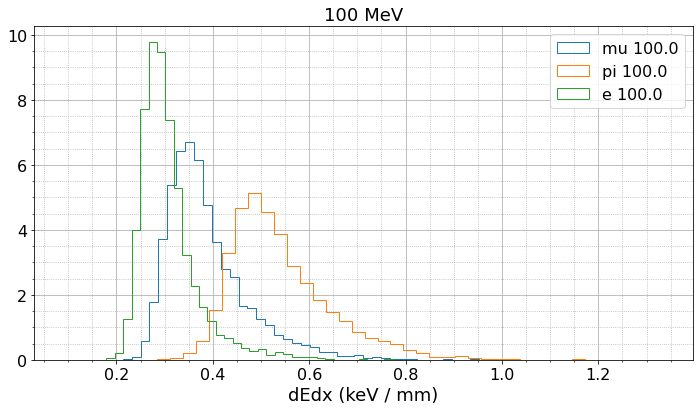

In [10]:
key = 100
dss = {item: apply_filter(np.load(data[item]), trkfilter[item])[:, 2] for item in keys_by_energy[key]}
dedx_compare_plot(dss, f'{key} MeV')

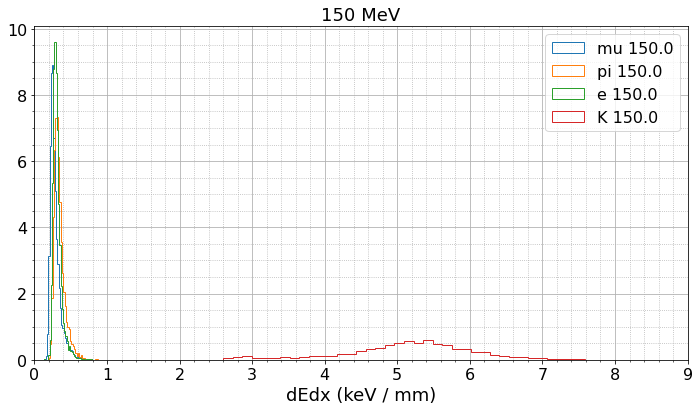

In [11]:
key = 150
dss = {item: apply_filter(np.load(data[item]), trkfilter[item])[:, 2] for item in keys_by_energy[key]}
dedx_compare_plot(dss, f'{key} MeV', xlim=(0, 9))

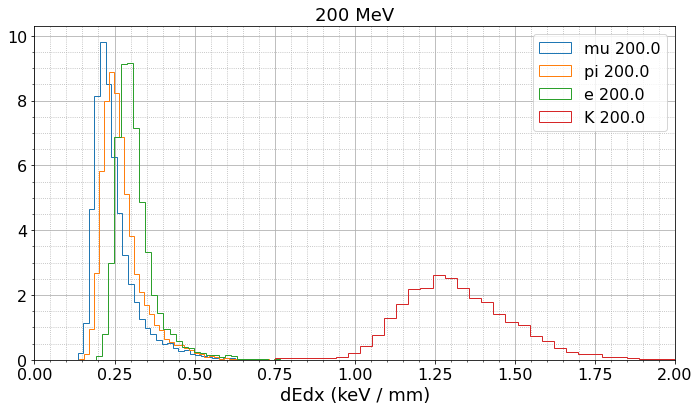

In [12]:
key = 200
dss = {item: apply_filter(np.load(data[item]), trkfilter[item])[:, 2] for item in keys_by_energy[key]}
dedx_compare_plot(dss, f'{key} MeV', xlim=(0, 2))

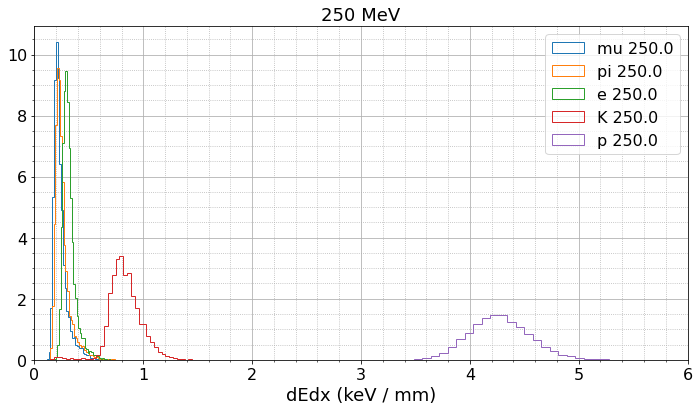

In [13]:
key = 250
dss = {item: apply_filter(np.load(data[item]), trkfilter[item])[:, 2] for item in keys_by_energy[key]}
dedx_compare_plot(dss, f'{key} MeV', xlim=(0, 6))

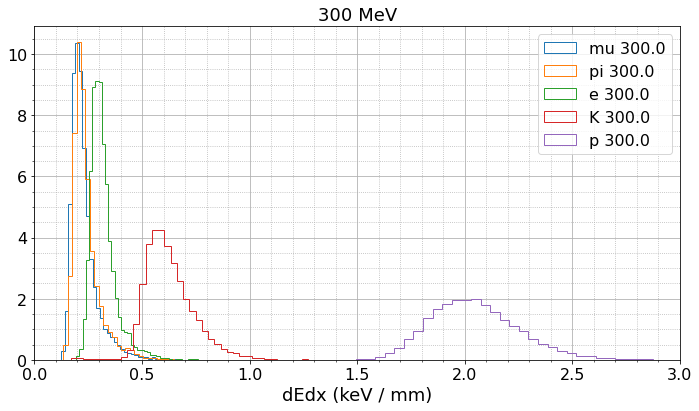

In [14]:
key = 300
dss = {item: apply_filter(np.load(data[item]), trkfilter[item])[:, 2] for item in keys_by_energy[key]}
dedx_compare_plot(dss, f'{key} MeV', xlim=(0, 3))

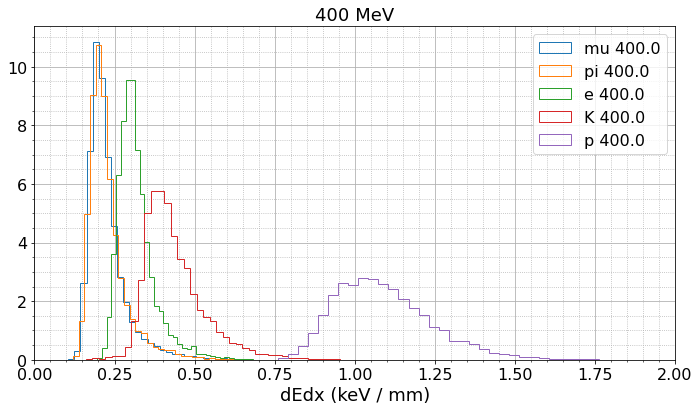

In [15]:
key = 400
dss = {item: apply_filter(np.load(data[item]), trkfilter[item])[:, 2] for item in keys_by_energy[key]}
dedx_compare_plot(dss, f'{key} MeV', xlim=(0, 2))

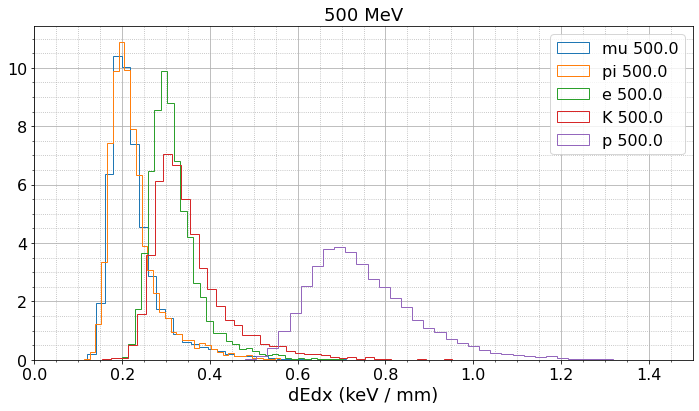

In [16]:
key = 500
dss = {item: apply_filter(np.load(data[item]), trkfilter[item])[:, 2] for item in keys_by_energy[key]}
dedx_compare_plot(dss, f'{key} MeV', xlim=(0, 1.5))

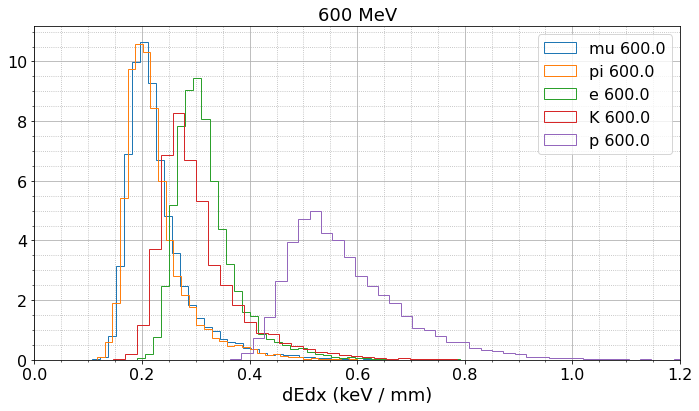

In [17]:
key = 600
dss = {item: apply_filter(np.load(data[item]), trkfilter[item])[:, 2] for item in keys_by_energy[key]}
dedx_compare_plot(dss, f'{key} MeV', xlim=(0, 1.2))

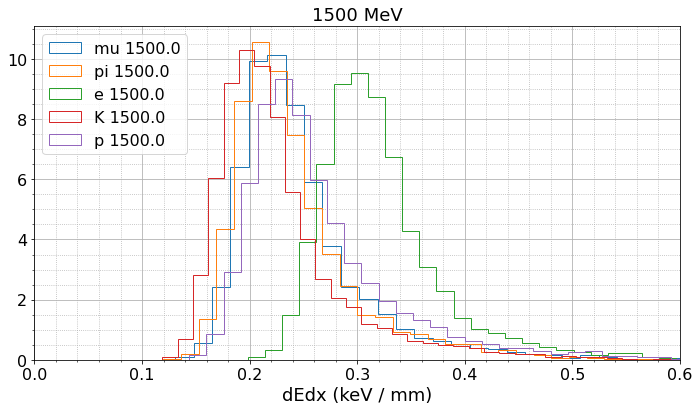

In [18]:
key = 1500
dss = {item: apply_filter(np.load(data[item]), trkfilter[item])[:, 2] for item in keys_by_energy[key]}
dedx_compare_plot(dss, f'{key} MeV', xlim=(0, 0.6))